In [1]:
# created by David Lisbonne

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
complete_data = pd.read_csv("games.csv");
pertinent = complete_data[["rated", "winner", "white_rating", "black_rating"]];
pertinent["rating_avg"] = (pertinent["white_rating"] + pertinent["black_rating"])/2;

In [5]:
rated_games = pertinent[pertinent["rated"] == True].sort_values(by="rating_avg")
unrated_games = pertinent[pertinent["rated"] == False].sort_values(by="rating_avg")

In [6]:
total_rated_games = rated_games.shape[0]
total_unrated_games = unrated_games.shape[0]

In [7]:
lowest = 800
increment = 60
counter = 0
rated_datadict = {}
upper_bound = lowest+increment*(counter + 1)
lower_bound = lowest+(increment*counter)

In [8]:
# RATED GAMES

while lower_bound <= rated_games["rating_avg"].max():
    games = rated_games[(rated_games["rating_avg"] >= lower_bound) & (rated_games["rating_avg"] < upper_bound)]
    rated_datadict[lower_bound] = games.shape[0]
    counter += 1
    upper_bound = lowest+increment*(counter + 1)
    lower_bound = lowest+(increment*counter)
    
rated_dist = pd.DataFrame(rated_datadict.items(), columns=["rating_chunk", "num_games"])

In [9]:
lowest = 800
increment = 60
counter = 0
unrated_datadict = {}
upper_bound = lowest+increment*(counter + 1)
lower_bound = lowest+(increment*counter)

In [10]:
# UNRATED GAMES

while lower_bound <= unrated_games["rating_avg"].max():
    games = unrated_games[(unrated_games["rating_avg"] >= lower_bound) & (unrated_games["rating_avg"] < upper_bound)]
    unrated_datadict[lower_bound] = games.shape[0]
    counter += 1
    upper_bound = lowest+increment*(counter + 1)
    lower_bound = lowest+(increment*counter)
    
unrated_dist = pd.DataFrame(unrated_datadict.items(), columns=["rating_chunk", "num_games"])

<Figure size 432x288 with 0 Axes>

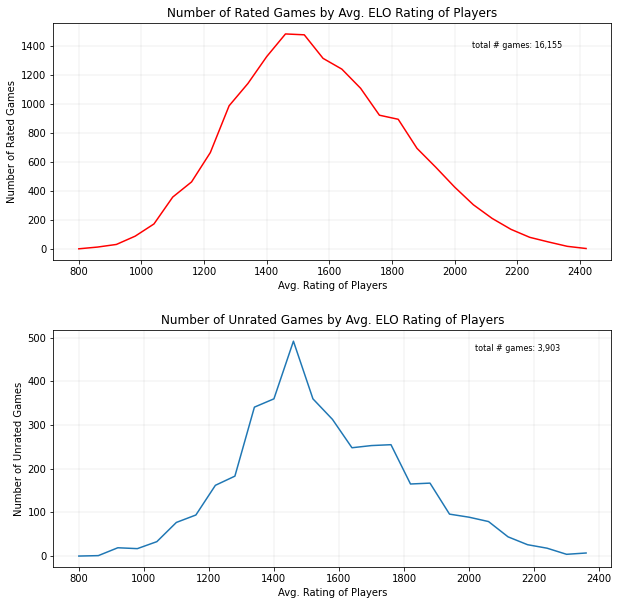

In [11]:
fig = plt.figure();
plt.figure(figsize=(10,10));

plt.subplot(2,1,1)
plt.plot(rated_dist["rating_chunk"], rated_dist["num_games"], color="red");
plt.text(2200, 1400, "total # games: 16,155", ha='center', va='center', fontsize=8);
plt.title("Number of Rated Games by Avg. ELO Rating of Players");
plt.xlabel("Avg. Rating of Players");
plt.ylabel("Number of Rated Games");
plt.grid(color="gray", linewidth=0.2, alpha=0.6)

plt.subplot(2,1,2)
plt.plot(unrated_dist["rating_chunk"], unrated_dist["num_games"]);
plt.text(2150, 475, "total # games: 3,903", ha='center', va='center', fontsize=8);
plt.title("Number of Unrated Games by Avg. ELO Rating of Players");
plt.xlabel("Avg. Rating of Players");
plt.ylabel("Number of Unrated Games");
plt.grid(color="gray", linewidth=0.2, alpha=0.6)

plt.subplots_adjust(hspace=0.3)
plt.show();